# Extremal Kerr black hole

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

The computations make use of tools developed through the [SageManifolds project](https://sagemanifolds.obspm.fr).

In [1]:
version()

'SageMath version 9.3.rc5, Release Date: 2021-04-30'

First we set up the notebook to display mathematical objects using LaTeX rendering:

In [2]:
%display latex

To speed up computations, we ask for running them in parallel on 8 threads:

In [3]:
Parallelism().set(nproc=8)

## Spacetime manifold

We declare the Kerr spacetime as a 4-dimensional Lorentzian manifold $M$:

In [4]:
M = Manifold(4, 'M', structure='Lorentzian')
print(M)

4-dimensional Lorentzian manifold M


We then introduce (3+1 version of) the **Kerr coordinates** $(\tilde{t},r,\theta,\tilde{\varphi})$ as a chart `KC` on $M$, via the method `chart()`. The argument of the latter is a string (delimited by `r"..."` because of the backslash symbols) expressing the coordinates names, their ranges (the default is $(-\infty,+\infty)$) and their LaTeX symbols:

In [5]:
KC.<tt,r,th,tph> = M.chart(r"tt:\tilde{t} r th:(0,pi):\theta tph:(0,2*pi):periodic:\tilde{\varphi}") 
print(KC); KC

Chart (M, (tt, r, th, tph))


Chart (M, (tt, r, th, tph))

In [6]:
KC.coord_range()

tt: (-oo, +oo); r: (-oo, +oo); th: (0, pi); tph: [0, 2*pi] (periodic)

## Metric tensor 

The mass parameter $m$ of the extremal Kerr spacetime is declared as a symbolic variable:

In [7]:
m = var('m', domain='real')
assume(m>0)

We get the (yet undefined) spacetime metric:

In [8]:
g = M.metric()

and initialize it by providing its components in the coordinate frame associated with the Kerr coordinates, which is the current manifold's default frame:

In [9]:
rho2 = r^2 + (m*cos(th))^2
g[0,0] = - (1 - 2*m*r/rho2)
g[0,1] = 2*m*r/rho2
g[0,3] = -2*m^2*r*sin(th)^2/rho2
g[1,1] = 1 + 2*m*r/rho2
g[1,3] = -m*(1 + 2*m*r/rho2)*sin(th)^2
g[2,2] = rho2
g[3,3] = (r^2 + m^2 + 2*m^3*r*sin(th)^2/rho2)*sin(th)^2
g.display()

g = (2*m*r/(m^2*cos(th)^2 + r^2) - 1) dtt*dtt + 2*m*r/(m^2*cos(th)^2 + r^2) dtt*dr - 2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) dtt*dtph + 2*m*r/(m^2*cos(th)^2 + r^2) dr*dtt + (2*m*r/(m^2*cos(th)^2 + r^2) + 1) dr*dr - m*(2*m*r/(m^2*cos(th)^2 + r^2) + 1)*sin(th)^2 dr*dtph + (m^2*cos(th)^2 + r^2) dth*dth - 2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) dtph*dtt - m*(2*m*r/(m^2*cos(th)^2 + r^2) + 1)*sin(th)^2 dtph*dr + (2*m^3*r*sin(th)^2/(m^2*cos(th)^2 + r^2) + m^2 + r^2)*sin(th)^2 dtph*dtph

A matrix view of the components with respect to the manifold's default vector frame:

In [10]:
g[:]

[                                2*m*r/(m^2*cos(th)^2 + r^2) - 1                                     2*m*r/(m^2*cos(th)^2 + r^2)                                                               0                        -2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2)]
[                                    2*m*r/(m^2*cos(th)^2 + r^2)                                 2*m*r/(m^2*cos(th)^2 + r^2) + 1                                                               0                  -m*(2*m*r/(m^2*cos(th)^2 + r^2) + 1)*sin(th)^2]
[                                                              0                                                               0                                             m^2*cos(th)^2 + r^2                                                               0]
[                       -2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2)                  -m*(2*m*r/(m^2*cos(th)^2 + r^2) + 1)*sin(th)^2                                                               0 (2*m^3*r*sin(th)^2/(m^2*cos(th)^2 + r^2) + m^2 + r^2)*sin(th)^2]

The list of the non-vanishing components:

In [11]:
g.display_comp()

g_tt,tt = 2*m*r/(m^2*cos(th)^2 + r^2) - 1 
g_tt,r = 2*m*r/(m^2*cos(th)^2 + r^2) 
g_tt,tph = -2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) 
g_r,tt = 2*m*r/(m^2*cos(th)^2 + r^2) 
g_r,r = 2*m*r/(m^2*cos(th)^2 + r^2) + 1 
g_r,tph = -m*(2*m*r/(m^2*cos(th)^2 + r^2) + 1)*sin(th)^2 
g_th,th = m^2*cos(th)^2 + r^2 
g_tph,tt = -2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) 
g_tph,r = -m*(2*m*r/(m^2*cos(th)^2 + r^2) + 1)*sin(th)^2 
g_tph,tph = (2*m^3*r*sin(th)^2/(m^2*cos(th)^2 + r^2) + m^2 + r^2)*sin(th)^2

## Einstein equation

Let us check that we are dealing with a solution of the **vacuum Einstein equation**:

In [12]:
g.ricci().display()

Ric(g) = 0

## Boyer-Lindquist coordinates

Let us introduce on the chart of Boyer-Lindquist coordinates $(t,r,\theta,\varphi)$:

In [13]:
BL.<t,r,th,ph> = M.chart(r"t r th:(0,pi):\theta ph:(0,2*pi):periodic:\varphi") 
print(BL); BL

Chart (M, (t, r, th, ph))


Chart (M, (t, r, th, ph))

In [14]:
BL.coord_range()

t: (-oo, +oo); r: (-oo, +oo); th: (0, pi); ph: [0, 2*pi] (periodic)

In [15]:
KC_to_BL = KC.transition_map(BL, [tt + 2*m^2/(r-m) - 2*m*ln(abs(r-m)/m),
                                  r,
                                  th,
                                  tph + m/(r-m)])
KC_to_BL.display()

t = -2*m*log(abs(-m + r)/m) - 2*m^2/(m - r) + tt
r = r
th = th
ph = tph - m/(m - r)

In [16]:
KC_to_BL.inverse().display()

tt = -(2*m^2*log(m) - 2*m*r*log(m) - 2*m^2 - (m - r)*t - 2*(m^2 - m*r)*log(abs(-m + r)))/(m - r)
r = r
th = th
tph = (m*ph - ph*r + m)/(m - r)

In [17]:
g.display(BL)

g = -(m^2*cos(th)^2 - 2*m*r + r^2)/(m^2*cos(th)^2 + r^2) dt*dt - 2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) dt*dph + (m^2*cos(th)^2 + r^2)/(m^2 - 2*m*r + r^2) dr*dr + (m^2*cos(th)^2 + r^2) dth*dth - 2*m^2*r*sin(th)^2/(m^2*cos(th)^2 + r^2) dph*dt + (2*m^3*r*sin(th)^4 + (m^2*r^2 + r^4 + (m^4 + m^2*r^2)*cos(th)^2)*sin(th)^2)/(m^2*cos(th)^2 + r^2) dph*dph

### Plot of the hypersurfaces $t=\mathrm{const}$ in terms of the Kerr coordinates

The plot is performed via the method `plot` of the Boyer-Lindquist chart:

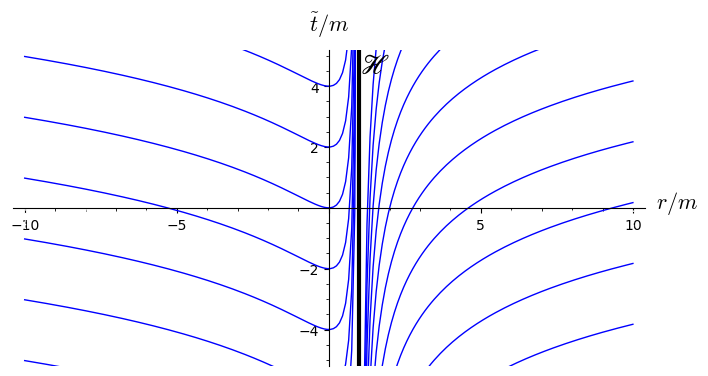

In [18]:
graph = BL.plot(KC, ambient_coords=(r, tt), fixed_coords={th: pi/2, ph: 0}, 
                ranges={t: (-10, 10), r: (-10, 10)}, steps={t: 2, r: 2}, 
                plot_points=200, style={t: ':', r: '-'}, color={t: 'white', r: 'blue'},
                parameters={m: 1})
Hor = line(((1, -8), (1, 8)), color='black', thickness=3) + \
      text(r'$\mathscr{H}$', (1.5, 4.7), color='black', fontsize=20)
graph += Hor
graph.set_aspect_ratio(1)
graph.save("exk_BL_slicing.pdf", axes_labels=[r"$r/m$", r"$\tilde{t}/m$"], 
           ymin=-5, ymax=5, figsize=7)
graph.show(axes_labels=[r"$r/m$", r"$\tilde{t}/m$"], ymin=-5, ymax=5, figsize=7)

## Ingoing principal null geodesics

In [19]:
k = M.vector_field(1, -1, 0, 0, name='k')
k.display()

k = d/dtt - d/dr

Let us check that $k$ is a null vector:

In [20]:
g(k, k).expr()

0

Check of $\nabla_k k = 0$:

In [21]:
nabla = g.connection()

In [22]:
nabla(k).contract(k).display()

0

Expression of $k$ with respect to the Boyer-Lindquist frame:

In [23]:
k.display(BL)

k = (m^2 + r^2)/(m^2 - 2*m*r + r^2) d/dt - d/dr + m/(m^2 - 2*m*r + r^2) d/dph

## Outgoing principal null geodesics

In [24]:
el = M.vector_field(1/2 + m*r/(r^2 + m^2),
                    1/2 - m*r/(r^2 + m^2),
                    0,
                    m/(r^2 + m^2),
                    name='el', latex_name=r'\ell')
el.display()

el = (m*r/(m^2 + r^2) + 1/2) d/dtt + (-m*r/(m^2 + r^2) + 1/2) d/dr + m/(m^2 + r^2) d/dtph

Let us check that $\ell$ is a null vector:

In [25]:
g(el, el).expr()

0

Expression of $\ell$ with respect to the Boyer-Lindquist frame:

In [26]:
el.display(BL)

el = 1/2 d/dt + (-m*r/(m^2 + r^2) + 1/2) d/dr + 1/2*m/(m^2 + r^2) d/dph

Computation of $\nabla_\ell \ell$:

In [27]:
acc = nabla(el).contract(el)
acc.display()

-1/2*(m^5 + 2*m^4*r - 2*m^2*r^3 - m*r^4)/(m^6 + 3*m^4*r^2 + 3*m^2*r^4 + r^6) d/dtt - 1/2*(m^5 - 2*m^4*r + 2*m^2*r^3 - m*r^4)/(m^6 + 3*m^4*r^2 + 3*m^2*r^4 + r^6) d/dr - (m^4 - m^2*r^2)/(m^6 + 3*m^4*r^2 + 3*m^2*r^4 + r^6) d/dtph

We check that $\nabla_\ell \ell = \kappa \ell$:

In [28]:
kappa = acc[0] / el[0]
kappa

-(m^3 - m*r^2)/(m^4 + 2*m^2*r^2 + r^4)

In [29]:
kappa.factor()

-(m + r)*(m - r)*m/(m^2 + r^2)^2

In [30]:
(acc/kappa).display()

1/2*(m^2 + 2*m*r + r^2)/(m^2 + r^2) d/dtt + 1/2*(m^2 - 2*m*r + r^2)/(m^2 + r^2) d/dr + m/(m^2 + r^2) d/dtph

In [31]:
acc == kappa*el

True

## Plot of principal null geodesics

In [32]:
lamb = var('lamb', latex_name=r'\lambda')
def inPNG(v0, th0, tph0):
    return M.curve({KC: [lamb + v0, -lamb, th0, tph0]}, param=lamb)

def outPNG_I(u0, th0, tph0):
    return M.curve({KC: [u0 + r - 4*m^2/(r - m) + 4*m*ln(abs(r - m)/m), 
                         r, th0, tph0]}, 
                   param=(r, 1, +oo))

def outPNG_III(u0, th0, tph0):
    return M.curve({KC: [u0 + r - 4*m^2/(r - m) + 4*m*ln(abs(r - m)/m), 
                         r, th0, tph0]}, 
                   param=(r, -oo, 1))

In [33]:
u, v = var('u v')
tt_in(r,v) = v - r
tt_in

(r, v) |--> -r + v

In [34]:
tt_out(r, u) = u + r - 4/(r - 1) + 4*ln(abs(r - 1))
tt_out

(r, u) |--> r + u - 4/(r - 1) + 4*log(abs(r - 1))

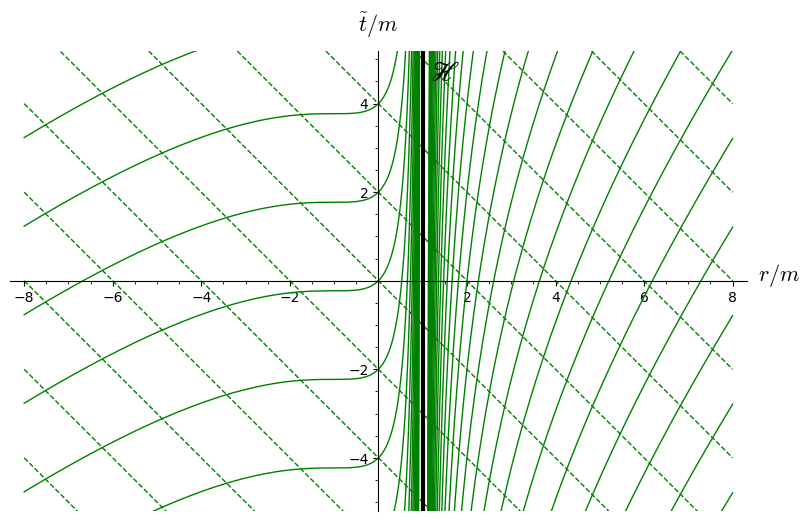

In [35]:
rmin = -8; rmax = 8
graph = Graphics()
for u0 in range(-40, 40, 2):
    graph += plot(tt_out(r, u0), (r, rmin, rmax), color='green', 
                  axes_labels=[r"$r/m$", r"$\tilde{t}/m$"])
for v0 in range(-20, 20, 2):
    graph += plot(tt_in(r, v0), (r, rmin, rmax), color='green', linestyle='--')

graph += Hor
graph.set_aspect_ratio(1)
graph.show(ymin=-5, ymax=5, figsize=8)

We add the vectors $k$ and $\ell$ at the intersection of the $v=6m$ ingoing geodesic with the $u=-6m$ outgoing one:

In [36]:
u0, v0 = -6, 6
r0 = RDF(find_root(tt_in(r, v0) == tt_out(r, u0), 2, 6))
tt0 = tt_in(r0, v0)
tt0, r0

(1.7455241690199994, 4.254475830980001)

In [37]:
p0 = M((tt0, r0, pi/2, 0), name='p_0')
k0 = k.at(p0)
print(k0)

Tangent vector k at Point p_0 on the 4-dimensional Lorentzian manifold M


In [38]:
el0 = el.at(p0)
print(el0)

Tangent vector el at Point p_0 on the 4-dimensional Lorentzian manifold M


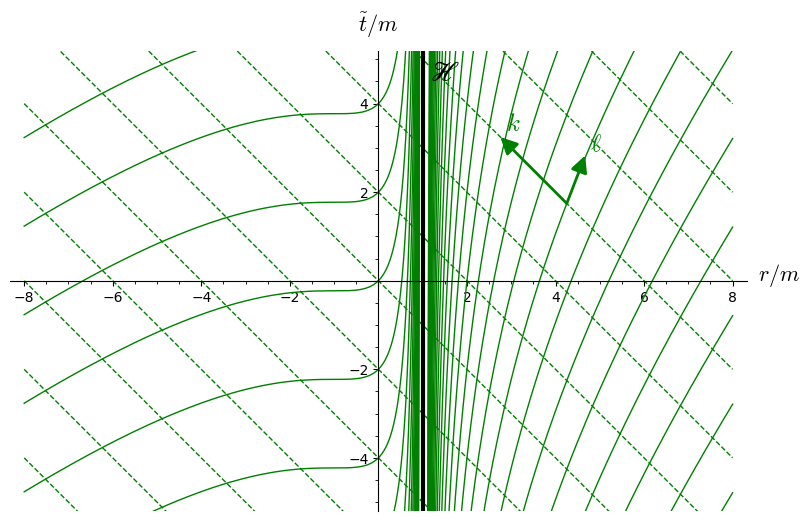

In [39]:
graph +=  k0.plot(chart=KC, ambient_coords=(r, tt), color='green', 
                  scale=1.5, fontsize=18, label_offset=0.3)  \
          + el0.plot(chart=KC, ambient_coords=(r, tt), color='green', 
                     parameters={m: 1}, scale=1.5, fontsize=18,
                     label_offset=0.25)
graph.save("exk_princ_null_geod.pdf", ymin=-5, ymax=5, figsize=8)
graph.show(ymin=-5, ymax=5, figsize=8)

In [40]:
umt(r) = u - tt_out(r, u)
umt(r)

-r + 4/(r - 1) - 4*log(abs(r - 1))

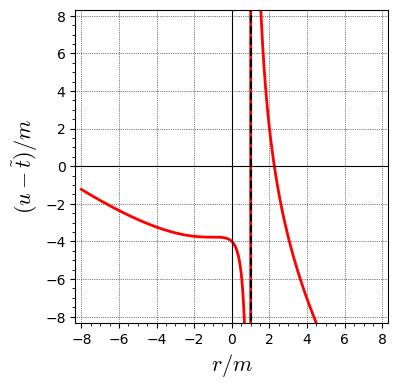

In [41]:
graph = plot(umt(r), (r, -8, 8), color='red', thickness=2, 
             axes_labels=[r"$r/m$", r"$(u - \tilde{t})/m$"], frame=True, 
             gridlines=True)
graph += line(((1, -10), (1, 10)), color='black', thickness=1.5, linestyle='--') 
show(graph, aspect_ratio=1, ymin=-8, ymax=8)

In [42]:
ttphi(r) = 2 / (r - 1)
ttphi(r)

2/(r - 1)

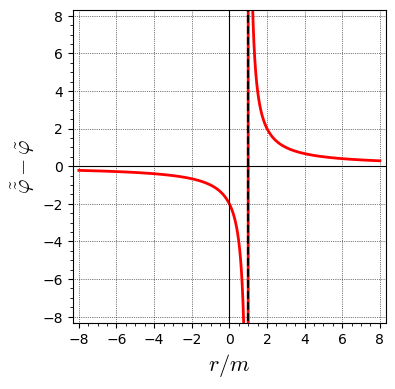

In [43]:
graph = plot(ttphi(r), (r, -8, 8), color='red', thickness=2, 
             axes_labels=[r"$r/m$", r"$\tilde{\tilde{\varphi}} - \tilde{\varphi}$"], 
             frame=True, gridlines=True)
graph += line(((1, -10), (1, 10)), color='black', thickness=1.5, linestyle='--')
show(graph, aspect_ratio=1, ymin=-8, ymax=8)

## Carter-Penrose diagram

In [44]:
uc = (tt - r)/m + 4*m/(r - m) - 4*ln(abs((r - m)/m))
uc 

-4*m/(m - r) - (r - tt)/m - 4*log(abs((m - r)/m))

In [45]:
vc = (tt + r)/m
vc

(r + tt)/m

### Functions $U(\tilde{t}, r)$ and $V(\tilde{t}, r)$

In [46]:
U(tt, r) = atan(uc/2) + pi*unit_step(m - r)
V(tt, r) = atan(vc/2)

#U(tt, r) = tanh(uc/4) + 2*unit_step(m - r)
#V(tt, r) = tanh(vc/4)

#U(tt, r) = atan(asinh(uc))
#V(tt, r) = atan(asinh(vc))

#U(tt, r) = atan(uc^3)
#V(tt, r) = atan(vc^3)

#U(tt, r) = atan(real_nth_root(uc, 3))
#V(tt, r) = atan(real_nth_root(vc, 3))

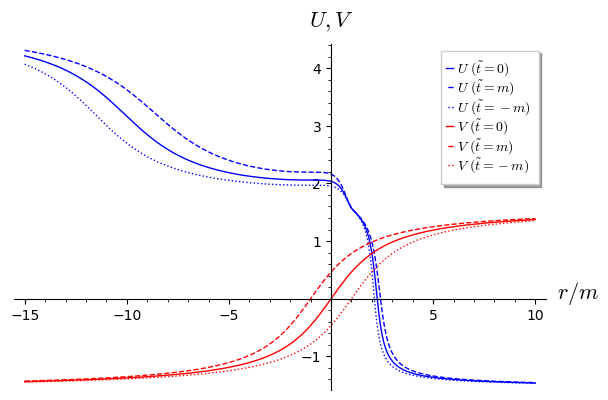

In [47]:
plot(U(0, r).subs({m: 1}), (r, -15, 10), axes_labels=[r'$r/m$', r'$U, V$'],
     legend_label=r'$U\  (\tilde{t}=0)$') \
+ plot(U(m, r).subs({m: 1}), (r, -15, 10), linestyle='--', 
       legend_label=r'$U\  (\tilde{t}=m)$') \
+ plot(U(-m, r).subs({m: 1}), (r, -15, 10), linestyle=':',
       legend_label=r'$U\  (\tilde{t}=-m)$') \
+ plot(V(0, r).subs({m: 1}), (r, -15, 10), color='red',
       legend_label=r'$V\  (\tilde{t}=0)$') \
+ plot(V(m, r).subs({m: 1}), (r, -15, 10), color='red', linestyle='--',
       legend_label=r'$V\  (\tilde{t}=m)$') \
+ plot(V(-m, r).subs({m: 1}), (r, -15, 10), color='red', linestyle=':',
       legend_label=r'$V\  (\tilde{t}=-m)$')

Zoom around $r=m$:

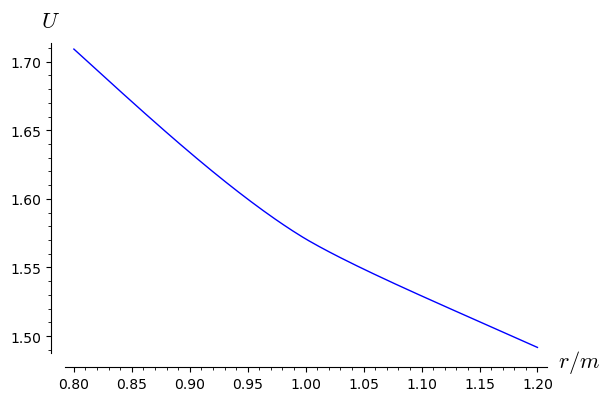

In [48]:
plot(U(0, r).subs({m: 1}), (r, 0.8, 1.2), axes_labels=[r'$r/m$', r'$U$']) 

$U = V$ for $r= 2m$:

In [49]:
U(tt, 2*m).simplify_full()

arctan(1/2*(2*m + tt)/m)

In [50]:
bool(_ == V(tt, 2*m))

True

### Functions $T(\tilde{t}, r)$ and $X(\tilde{t}, r)$

In [51]:
Tf(tt, r) = U(tt, r) + V(tt, r)
Xf(tt, r) = V(tt, r) - U(tt, r)

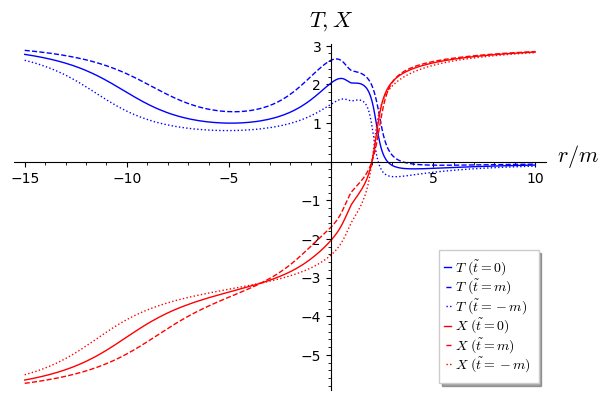

In [52]:
plot(Tf(0, r).subs({m: 1}), (r, -15, 10), axes_labels=[r'$r/m$', r'$T, X$'],
     legend_label=r'$T\  (\tilde{t}=0)$') \
+ plot(Tf(m, r).subs({m: 1}), (r, -15, 10), linestyle='--', 
       legend_label=r'$T\  (\tilde{t}=m)$') \
+ plot(Tf(-m, r).subs({m: 1}), (r, -15, 10), linestyle=':',
       legend_label=r'$T\  (\tilde{t}=-m)$') \
+ plot(Xf(0, r).subs({m: 1}), (r, -15, 10), color='red',
       legend_label=r'$X\  (\tilde{t}=0)$') \
+ plot(Xf(m, r).subs({m: 1}), (r, -15, 10), color='red', linestyle='--',
       legend_label=r'$X\  (\tilde{t}=m)$') \
+ plot(Xf(-m, r).subs({m: 1}), (r, -15, 10), color='red', linestyle=':',
       legend_label=r'$X\  (\tilde{t}=-m)$')

Zoom around $r=m$:

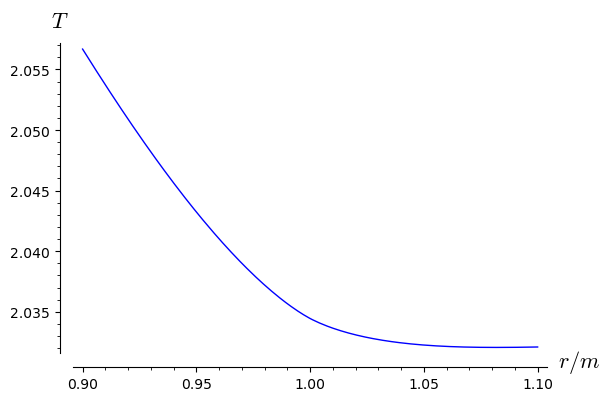

In [53]:
plot(Tf(0, r).subs({m: 1}), (r, 0.9, 1.1), axes_labels=[r'$r/m$', r'$T$'])

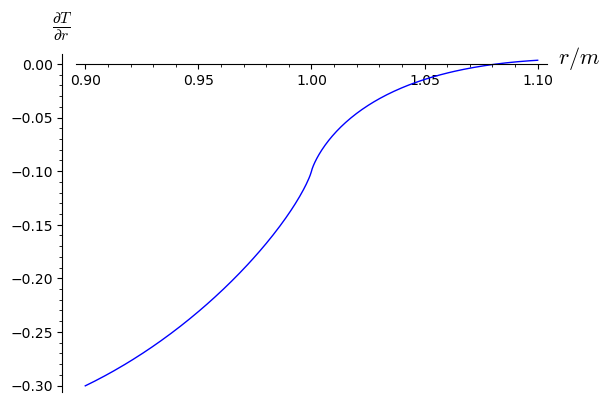

In [54]:
plot(diff(Tf(0, r), r).subs({m: 1}), (r, 0.9, 1.1), 
     axes_labels=[r'$r/m$', r'$\frac{\partial T}{\partial r}$']) 

Same value of $X$ for all $\tilde{t}$ for $r = r_1$:

In [55]:
s = -2*r + 4/(r -1) - 4*ln(1 -r)
s

-2*r + 4/(r - 1) - 4*log(-r + 1)

In [56]:
r1 = find_root(s, -4, -3)
r1

-3.4273344950702875

### Compactified coordinates

In [57]:
CC.<T,X,th,tph> = M.chart(r"T:(-pi,2*pi) X:(-2*pi,pi) th:(0,pi):\theta tph:(0,2*pi):periodic:\tilde{\varphi}")
CC

Chart (M, (T, X, th, tph))

In [58]:
CC.coord_range()

T: (-pi, 2*pi); X: (-2*pi, pi); th: (0, pi); tph: [0, 2*pi] (periodic)

In [59]:
KC_to_CC = KC.transition_map(CC, [Tf(tt, r), Xf(tt, r), th, tph])
KC_to_CC.display()

T = pi*unit_step(m - r) + arctan(-2*m/(m - r) - 1/2*(r - tt)/m - 2*log(abs((m - r)/m))) + arctan(1/2*(r + tt)/m)
X = -pi*unit_step(m - r) - arctan(-2*m/(m - r) - 1/2*(r - tt)/m - 2*log(abs((m - r)/m))) + arctan(1/2*(r + tt)/m)
th = th
tph = tph

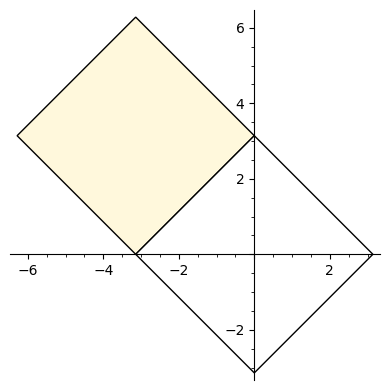

In [60]:
graph0 = polygon([(0, pi), (-pi, 2*pi), (-2*pi, pi), (-pi, 0)], 
                color='cornsilk', edgecolor='black') \
         + polygon([(pi, 0), (0, pi), (-pi, 0), (0, -pi)], 
                   color='white', edgecolor='black')
graph0

In [61]:
Hor = line([(-pi,0), (0, pi)], color='black', thickness=3) \
      + text(r'$\mathscr{H}$', (-0.6, 3), color='black', fontsize=20)

In [62]:
def plot_const_r(r0, color='red', linestyle=':', thickness=1, plot_points=400):
    return KC.plot(CC, ambient_coords=(X,T), fixed_coords={th: pi/3, tph: 0, r: r0},
                   ranges={tt: (-100, 100)}, color=color, style=linestyle,
                   thickness=thickness, plot_points=plot_points, parameters={m: 1})

def plot_const_tt(tt0, color='darkgrey', linestyle='-', thickness=1, plot_points=100):
    resu = KC.plot(CC, ambient_coords=(X,T), fixed_coords={th: pi/3, tph: 0, tt: tt0},
                   ranges={r: (-100, -10)}, color=color, style=linestyle,
                   thickness=thickness, plot_points=plot_points, parameters={m: 1}) \
           + KC.plot(CC, ambient_coords=(X,T), fixed_coords={th: pi/3, tph: 0, tt: tt0},
                     ranges={r: (-10, 10)}, color=color, style=linestyle,
                     thickness=thickness, plot_points=plot_points, parameters={m: 1}) \
           + KC.plot(CC, ambient_coords=(X,T), fixed_coords={th: pi/3, tph: 0, tt: tt0},
                     ranges={r: (10, 100)}, color=color, style=linestyle,
                     thickness=thickness, plot_points=plot_points, parameters={m: 1})
    return resu

Plot of $r=\mathrm{const}$ curves:

In [63]:
graph_r = Graphics()

rmin, rmax = -10, 0
dr = 2
nr = (rmax - rmin)/dr
for i in range(int(nr)):
    ri = rmin + dr*i
    graph_r += plot_const_r(ri) 

In [64]:
rmin, rmax = 0, 0.8
dr = 0.2
nr = (rmax - rmin)/dr + 1
for i in range(int(nr)):
    ri = rmin + dr*i
    graph_r += plot_const_r(ri) 

In [65]:
rmin, rmax = 1.2, 3
dr = 0.2
nr = (rmax - rmin)/dr + 1
for i in range(int(nr)):
    ri = rmin + dr*i
    graph_r += plot_const_r(ri) 

In [66]:
rmin, rmax = 3, 13
dr = 2
nr = (rmax - rmin)/dr + 1
for i in range(int(nr)):
    ri = rmin + dr*i
    graph_r += plot_const_r(ri) 
graph_r += plot_const_r(0, color='maroon', linestyle='--', thickness=2)

In [67]:
graph1 = graph0 + plot_const_tt(0, color='darkgrey', thickness=2)

In [68]:
tmin, tmax = -20, 20
dt = 2
nt = (tmax - tmin)/dt
for i in range(nt):
    ti = tmin + dt*i
    graph1 += plot_const_tt(ti) 

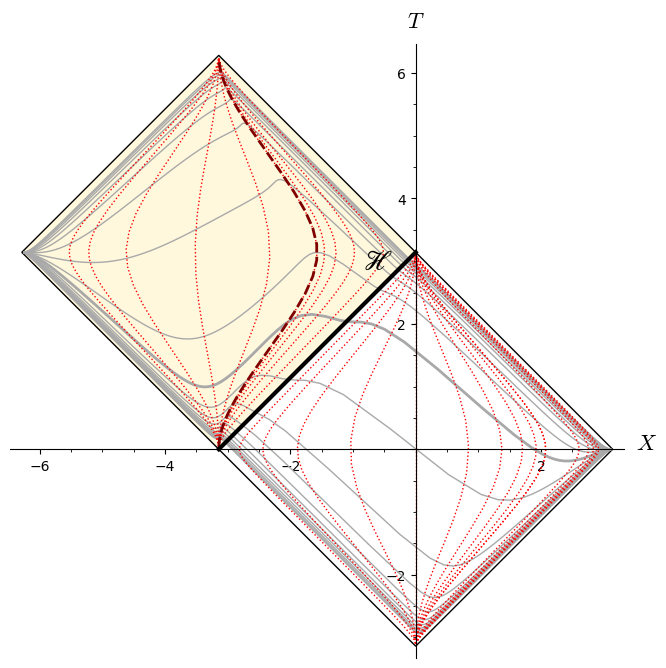

In [69]:
graph1 += graph_r + Hor
show(graph1, figsize=10)

Adding some principal null geodesics to the plot:

In [70]:
graph_PNG = Graphics()

for L in [inPNG(0, pi/3, 0), inPNG(-4, pi/3, 0), inPNG(4, pi/3, 0)]:
    L.expr(chart2=CC)
    graph_PNG += L.plot(CC, ambient_coords=(X, T), color='green', style='--', 
                        max_range=100, plot_points=5, parameters={m: 1})
    
for L in [outPNG_I(0, pi/3, 0), outPNG_I(-4, pi/3, 0), outPNG_I(4, pi/3, 0)]:
    L.expr(chart2=CC)
    graph_PNG += L.plot(CC, ambient_coords=(X, T), color='green', 
                        prange=(1.001, 100), plot_points=5, parameters={m: 1})

for L in [outPNG_III(0, pi/3, 0), outPNG_III(-4, pi/3, 0), outPNG_III(4, pi/3, 0)]:
    L.expr(chart2=CC)
    graph_PNG += L.plot(CC, ambient_coords=(X, T), color='green', 
                        prange=(-100, 0.999), plot_points=5, parameters={m: 1})

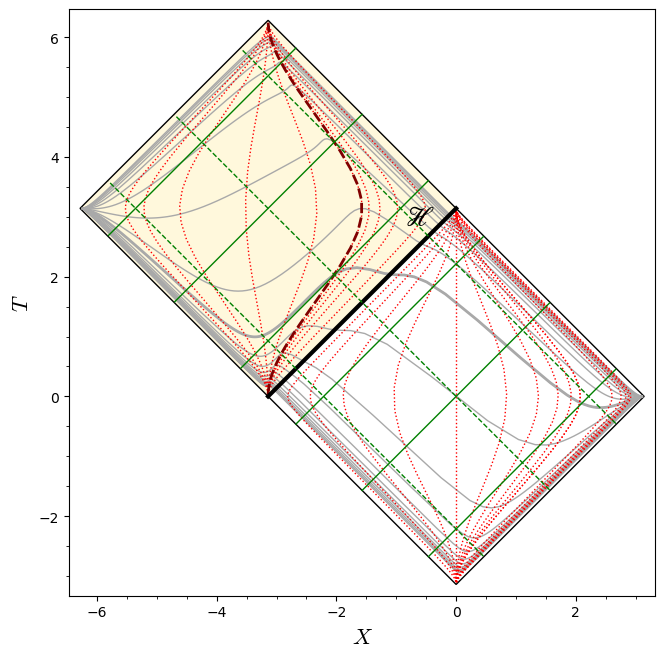

In [71]:
graph1 += graph_PNG
show(graph1, figsize=10, axes=False, frame=True)

We save the plot in png format, in order to add easily labels on it with Inkscape:

In [72]:
graph1.save('exk_CPdiag_Kerr-raw.svg', figsize=10, axes=False, frame=True)

### Carter-Penrose diagram with Boyer-Lindquist time slices

In [73]:
BL_to_CC = KC_to_CC * KC_to_BL.inverse()
BL_to_CC.display()

T = pi*unit_step(m - r) + arctan(1/2*(2*m^2*log(m) - 2*m^2 - (2*m*log(m) + m)*r + r^2 + (m - r)*t - 2*(m^2 - m*r)*log(abs(-m + r)))/(m^2 - m*r)) + arctan(-1/2*(2*m^2*log(m) - 2*m^2 - (2*m*log(m) + m)*r + r^2 - (m - r)*t - 2*(m^2 - m*r)*log(abs(-m + r)))/(m^2 - m*r))
X = -pi*unit_step(m - r) - arctan(1/2*(2*m^2*log(m) - 2*m^2 - (2*m*log(m) + m)*r + r^2 + (m - r)*t - 2*(m^2 - m*r)*log(abs(-m + r)))/(m^2 - m*r)) + arctan(-1/2*(2*m^2*log(m) - 2*m^2 - (2*m*log(m) + m)*r + r^2 - (m - r)*t - 2*(m^2 - m*r)*log(abs(-m + r)))/(m^2 - m*r))
th = th
tph = (m*ph - ph*r + m)/(m - r)

In [74]:
def plot_const_t(t0, color='blue', linestyle='-', thickness=1, plot_points=50):
    resu = BL.plot(CC, ambient_coords=(X,T), fixed_coords={th: pi/3, ph: 0, t: t0},
                   ranges={r: (-100, -10)}, color=color, style=linestyle,
                   thickness=thickness, plot_points=plot_points, parameters={m: 1}) \
           + BL.plot(CC, ambient_coords=(X,T), fixed_coords={th: pi/3, ph: 0, t: t0},
                     ranges={r: (-10, 0)}, color=color, style=linestyle,
                     thickness=thickness, plot_points=plot_points, parameters={m: 1}) \
           + BL.plot(CC, ambient_coords=(X,T), fixed_coords={th: pi/3, ph: 0, t: t0},
                     ranges={r: (0, 0.999)}, color=color, style=linestyle,
                     thickness=thickness, plot_points=plot_points, parameters={m: 1}) \
           + BL.plot(CC, ambient_coords=(X,T), fixed_coords={th: pi/3, ph: 0, t: t0},
                     ranges={r: (0.999, 3)}, color=color, style=linestyle,
                     thickness=thickness, plot_points=plot_points, parameters={m: 1}) \
           + BL.plot(CC, ambient_coords=(X,T), fixed_coords={th: pi/3, ph: 0, t: t0},
                     ranges={r: (3, 100)}, color=color, style=linestyle,
                     thickness=thickness, plot_points=plot_points, parameters={m: 1})
    return resu

In [75]:
tmin, tmax = -20, 20
dt = 2
nt = (tmax - tmin)/dt
graph2 = graph0
for i in range(nt):
    ti = tmin + dt*i
    graph2 += plot_const_t(ti) 

In [76]:
graph2 += graph_r + Hor

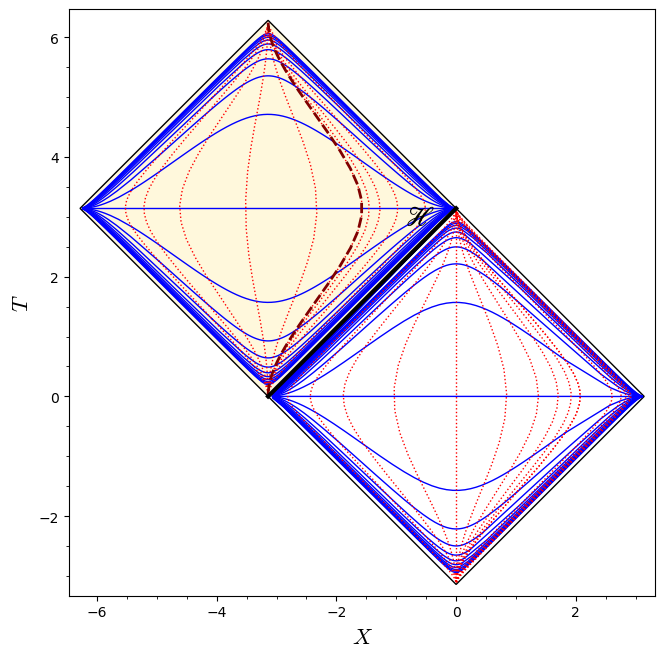

In [77]:
graph2.save('exk_CPdiag_BL-raw.svg', figsize=10, axes=False, frame=True)
show(graph2, figsize=10, axes=False, frame=True)